In [21]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Dataset con granularità di 1 giorno
dati = pd.read_csv('bitcoin_data.csv')
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])
data_inizio = '2020-03-01'
data_fine = '2021-03-01'
data1 = datetime.strptime(data_inizio, '%Y-%m-%d')
data2 = datetime.strptime(data_fine, '%Y-%m-%d')
lunghezza_periodo = (data2-data1).days
lunghezza_periodo
dati[dati['Timestamp'] == data_inizio]
indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]
indice_fine = dati[dati['Timestamp'] == data_fine].index[0]
dati = dati[indice_inizio:indice_fine + 1]
dati = dati.reset_index(drop=True)
dati

,Timestamp,Price
0,2020-03-01,8552.989119
1,2020-03-02,8567.802249
2,2020-03-03,8905.876104
3,2020-03-04,8756.718577
4,2020-03-05,8758.646993
...,...,...
361,2021-02-25,49849.378714
362,2021-02-26,46992.665450
363,2021-02-27,46551.487477
364,2021-02-28,46653.526399


In [34]:
# Inizializza le variabili
potenziale_previsto = 10
timeframe = 1
bitcoin_iniziali = 0.1
bitcoin_posseduti = bitcoin_iniziali
deposito_iniziale = 1000
deposito = deposito_iniziale
acquisto_attivo = True

max_delta_neg = -np.inf

# Inizializza le liste per memorizzare i valori
valori_bitcoin = []
valori_deposito = []
valori_portafoglio = []

# Calcola il controvalore iniziale dei bitcoin
prezzo_giorno_0 = dati['Price'].iloc[0]
controvalore_iniziale = bitcoin_posseduti * prezzo_giorno_0

# Applica la strategia di trading
for i in range(1, len(dati)):
    prezzo_corrente = dati['Price'].iloc[i]
    
    if i % timeframe == 0:
        if deposito_iniziale - deposito > max_delta_neg:
            max_delta_neg = deposito_iniziale - deposito

        if prezzo_corrente > prezzo_giorno_0:
            rapporto_prezzi = prezzo_corrente / prezzo_giorno_0
            percentuale_vendita = min(rapporto_prezzi / potenziale_previsto, 1)
            bitcoin_venduti = bitcoin_posseduti * percentuale_vendita
            bitcoin_posseduti -= bitcoin_venduti
            deposito += bitcoin_venduti * prezzo_corrente
        elif prezzo_corrente < prezzo_giorno_0 and acquisto_attivo:
            controvalore_corrente = bitcoin_posseduti * prezzo_corrente
            differenza_controvalore = controvalore_iniziale - controvalore_corrente
            if differenza_controvalore <= deposito:
                bitcoin_acquistati = differenza_controvalore / prezzo_corrente
                bitcoin_posseduti += bitcoin_acquistati
                deposito -= differenza_controvalore

    valori_bitcoin.append(bitcoin_posseduti * prezzo_corrente)
    valori_deposito.append(deposito)
    valori_portafoglio.append(bitcoin_posseduti * prezzo_corrente + deposito)


valore_finale = bitcoin_posseduti * prezzo_corrente + deposito
# Calcola il rendimento del portafoglio
rendimento = (valore_finale + max_delta_neg - deposito_iniziale) / (max_delta_neg + bitcoin_iniziali * prezzo_giorno_0)

print(f'Bitcoin posseduti alla fine: {bitcoin_posseduti}')
print(f'Deposito finale: {deposito}')
print('max_delta_neg:', max_delta_neg)
print(f'Rendimento del portafoglio: {rendimento}')

Bitcoin posseduti alla fine: 1.049384148572698e-35
Deposito finale: 2071.500201410464
max_delta_neg: 332.4743446123666
Rendimento del portafoglio: 1.1820223585389882


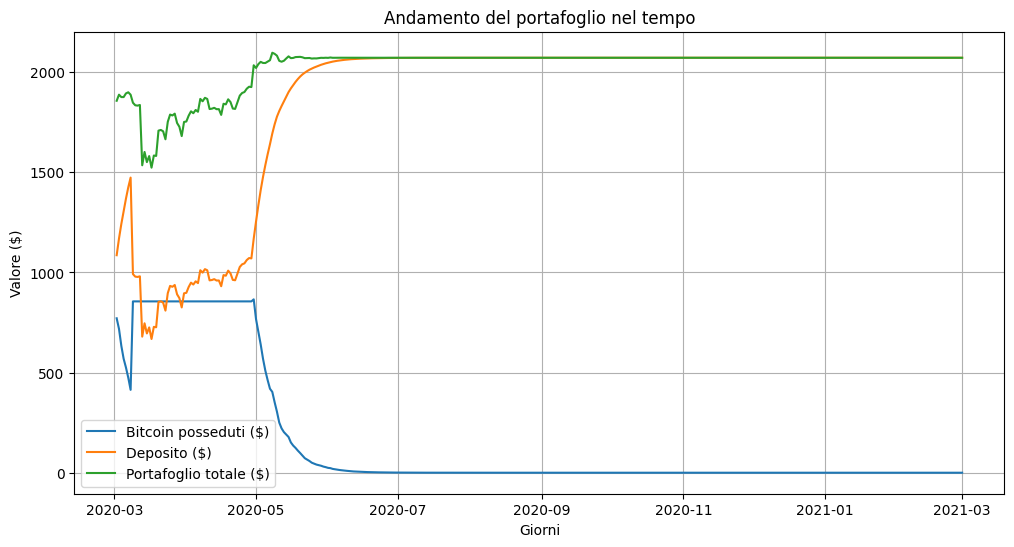

In [35]:
# Crea il grafico
x = dati['Timestamp'].iloc[1:]
plt.figure(figsize=(12, 6))
plt.plot(x, valori_bitcoin, label='Bitcoin posseduti ($)')
plt.plot(x, valori_deposito, label='Deposito ($)')
plt.plot(x, valori_portafoglio, label='Portafoglio totale ($)')
plt.legend()
plt.title('Andamento del portafoglio nel tempo')
plt.xlabel('Giorni')
plt.ylabel('Valore ($)')
plt.grid()
plt.show()